# Project: Investigate a Dataset - [No-show Appointments Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is centered on predicting whether patients will attend their scheduled medical appointments, based on several characteristics. Below is a detailed description of this dataset:
- PatientId: A unique identifier for each patient.
- AppointmentID: A unique identifier for each appointment.
- Gender: The gender of the patient (M for Male, F for Female).
- ScheduledDay: The date and time when the appointment was scheduled.
- AppointmentDay: The date of the actual appointment.
- Age: Age of the patient.
- Neighbourhood: The location or area where the hospital or clinic is situated.
- Scholarship: Indicates whether the patient is enrolled in Brazil's Bolsa Família program (1 if yes, 0 if no).
- Hipertension: Indicates whether the patient has hypertension (1 if yes, 0 if no).
- Diabetes: Indicates whether the patient has diabetes (1 if yes, 0 if no).
- Alcoholism: Indicates whether the patient is an alcoholic (1 if yes, 0 if no).
- Handcap: The number of disabilities the patient has (ranging from 0 to 4).
- SMS_received: Indicates if the patient received an SMS reminder for the appointment (1 if yes, 0 if no).
- No-show: The target variable, where ‘Yes’ means the patient missed the appointment, and ‘No’ means the patient attended.”

### Question(s) for Analysis
1. What factors influence a patient's likelihood of attending their medical appointment?
2. Does receiving an SMS reminder increase the likelihood of attending a medical appointment?
3. Do medical conditions like hypertension, diabetes, and alcoholism impact appointment attendance?

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
%matplotlib inline
sns.set(style="whitegrid")


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [9]:
import pandas as pd

# Load the dataset
file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("First few rows of the dataset:")
display(data.head())

# Check the size of the DataFrame (rows, columns)
print("\nSize of the DataFrame (rows, columns):")
display(data.shape)

# Check data types of each column
print("\nData types of each column:")
display(data.dtypes)

# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
display(missing_values)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(data.describe())

# Check for duplicates in the dataset
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:")
display(duplicates)
# Display the number of unique values in each column
nunique = data.nunique()
display(nunique)



First few rows of the dataset:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



Size of the DataFrame (rows, columns):


(110527, 14)


Data types of each column:


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


Missing values in each column:


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


Summary statistics for numerical columns:


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



Number of duplicate rows in the dataset:


0

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
 

In [10]:
# Remove duplicate rows if any exist
if data.duplicated().any():
    data.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

# Address missing values
columns_with_missing_values = data.columns[data.isnull().any()]
for column in columns_with_missing_values:
    data[column].fillna('Unknown', inplace=True)

# Ensure correct data types
# Here, convert 'ScheduledDay' and 'AppointmentDay' to datetime format if they exist
if 'ScheduledDay' in data.columns:
    data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
if 'AppointmentDay' in data.columns:
    data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')

# Display the first few rows of the cleaned dataframe
display(data.head())


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What factors influence a patient's likelihood of attending their medical appointment?

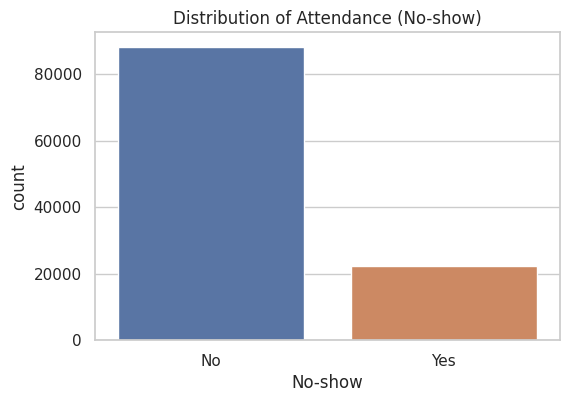

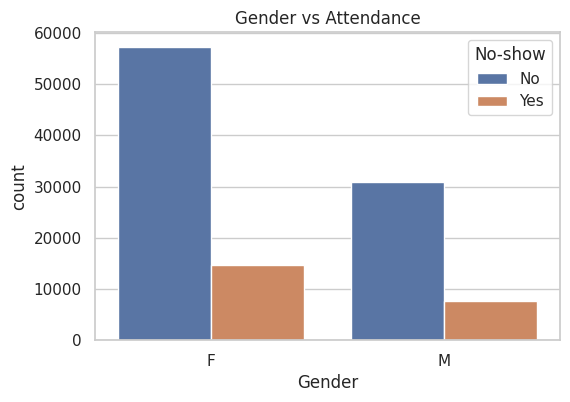

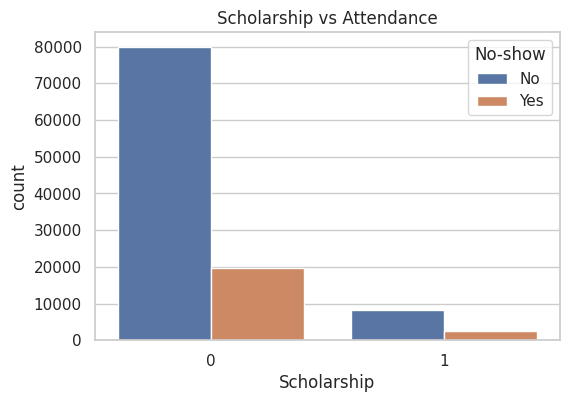

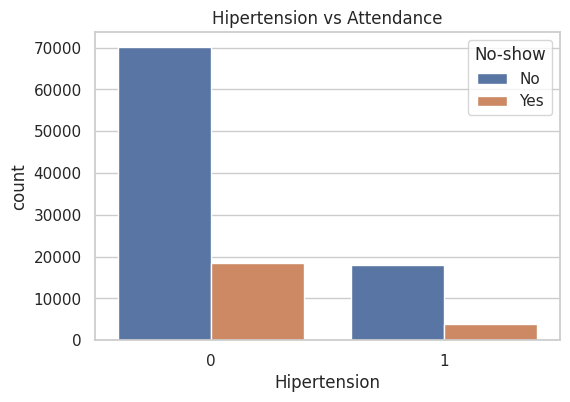

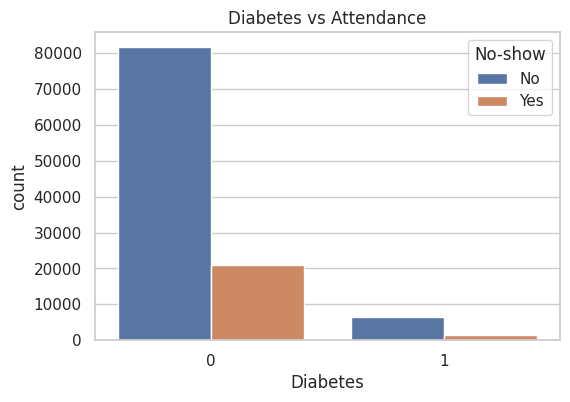

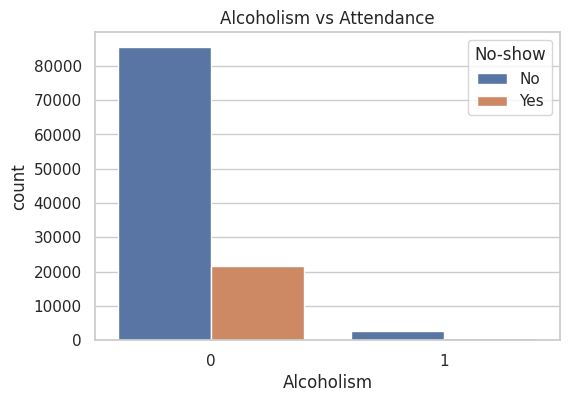

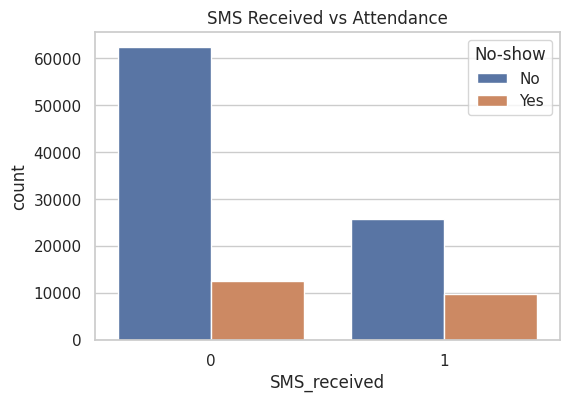

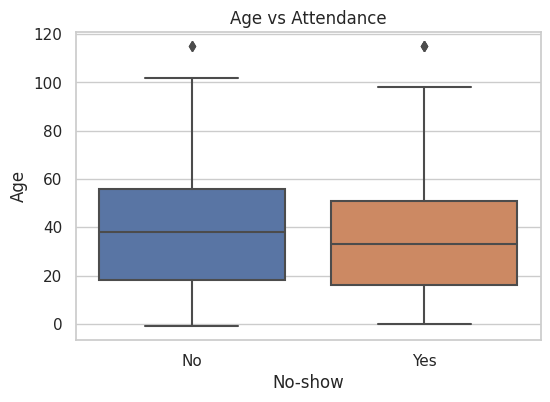

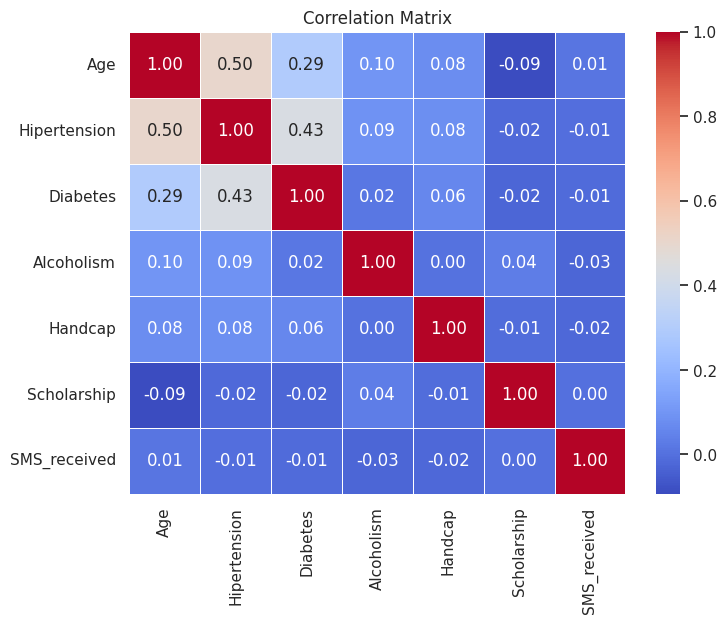

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     17669
         Yes       1.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.90      0.50      0.44     22106
weighted avg       0.84      0.80      0.71     22106



In [24]:

# 1.1 Distribution of Attendance (No-show) - Visualize the number of attendees and no-shows
plt.figure(figsize=(6,4))
sns.countplot(x='No-show', data=data)
plt.title('Distribution of Attendance (No-show)')
plt.show()

# 1.2 Gender vs Attendance - Visualize how attendance varies by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='No-show', data=data)
plt.title('Gender vs Attendance')
plt.show()

# 1.3 Scholarship vs Attendance - Check if being in a scholarship program affects attendance
plt.figure(figsize=(6,4))
sns.countplot(x='Scholarship', hue='No-show', data=data)
plt.title('Scholarship vs Attendance')
plt.show()

# 1.4 Health conditions (Hypertension, Diabetes, Alcoholism) vs Attendance
# Visualize how health conditions relate to whether the patient attends the appointment
health_columns = ['Hipertension', 'Diabetes', 'Alcoholism']
for col in health_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='No-show', data=data)
    plt.title(f'{col} vs Attendance')
    plt.show()

# 1.5 SMS Received vs Attendance - Visualize how receiving an SMS reminder affects attendance
plt.figure(figsize=(6,4))
sns.countplot(x='SMS_received', hue='No-show', data=data)
plt.title('SMS Received vs Attendance')
plt.show()

# 1.6 Age vs Attendance - Visualize the relationship between age and attendance using a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='No-show', y='Age', data=data)
plt.title('Age vs Attendance')
plt.show()

# 2. Correlation Analysis - Calculate and visualize the correlation matrix for numerical features
# This helps identify which features are most strongly correlated with the target variable
corr = data[['Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship', 'SMS_received', 'No-show']].corr(numeric_only=True)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 3. Feature Importance with Logistic Regression - Use logistic regression to identify the most important features affecting attendance
# Prepare the features (X) and target variable (y)
X = data[['Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship', 'SMS_received']]
y = data['No-show']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

# Print classification report to evaluate the model performance
print(classification_report(y_test, y_pred, zero_division=1))


### Research Question 2: Does receiving an SMS reminder increase the likelihood of attending a medical appointment?

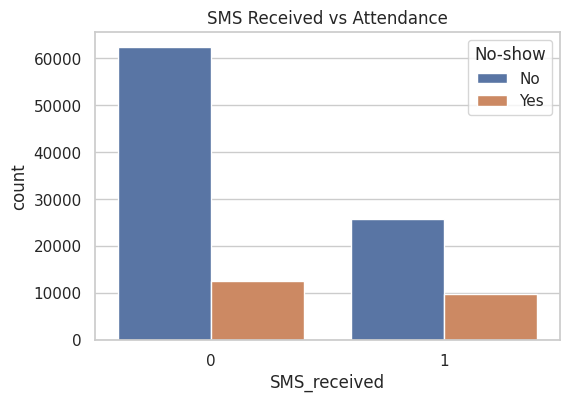

              precision    recall  f1-score   support

          No       0.83      0.68      0.75     17669
         Yes       0.26      0.45      0.33      4437

    accuracy                           0.63     22106
   macro avg       0.55      0.57      0.54     22106
weighted avg       0.72      0.63      0.67     22106

Coefficient for SMS_received: 0.3080037002028411
P-value from Chi-squared test: 0.0


In [17]:
# 1. Distribution of Attendance (No-show) based on SMS received
plt.figure(figsize=(6,4))
sns.countplot(x='SMS_received', hue='No-show', data=data)
plt.title('SMS Received vs Attendance')
plt.show()

# 2. Logistic Regression - Feature Importance (SMS_received)
# Prepare the features (X) and target variable (y)
X = data[['Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship', 'SMS_received']]
y = data['No-show']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with class weights to handle class imbalance
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Get model coefficients to see the effect of SMS_received
coefficients = model.coef_[0]
sms_coeff = coefficients[X.columns.get_loc('SMS_received')]

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

# Print the classification report with zero_division=1 to avoid the warning
print(classification_report(y_test, y_pred, zero_division=1))

# Print the coefficient for SMS_received
print(f'Coefficient for SMS_received: {sms_coeff}')

# 3. Chi-squared Test for Statistical Significance
# Create a contingency table for SMS_received and No-show
contingency_table = pd.crosstab(data['SMS_received'], data['No-show'])

# Perform Chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value from the Chi-squared test
print(f'P-value from Chi-squared test: {p_value}')



### Research Question 3: Do medical conditions like hypertension, diabetes, and alcoholism impact appointment attendance?

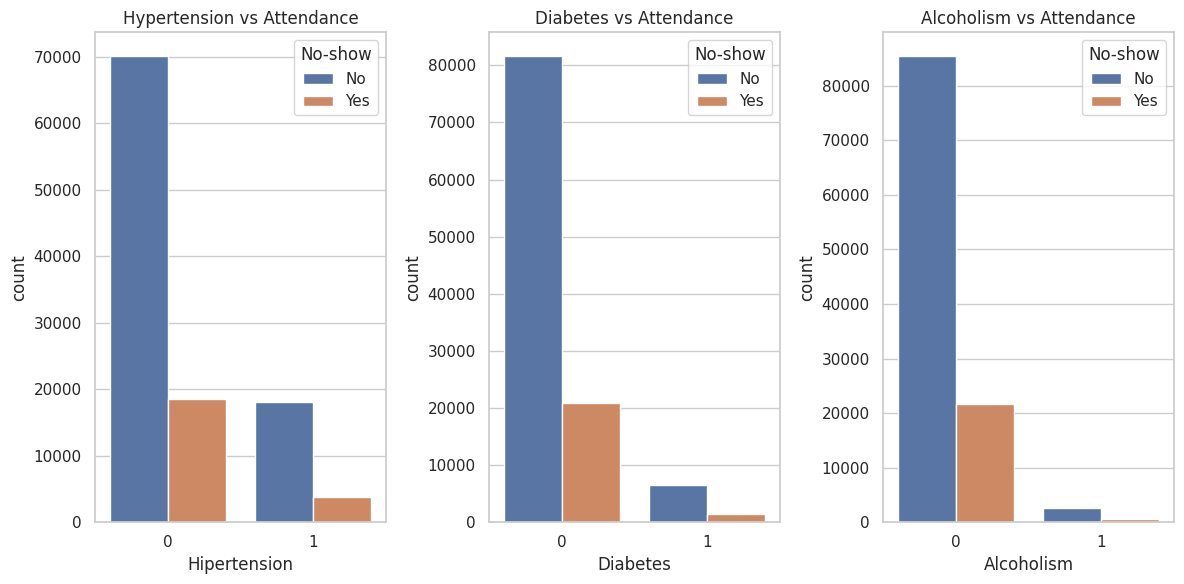

              precision    recall  f1-score   support

          No       0.83      0.68      0.75     17669
         Yes       0.26      0.45      0.33      4437

    accuracy                           0.63     22106
   macro avg       0.55      0.57      0.54     22106
weighted avg       0.72      0.63      0.67     22106

Coefficient for Hypertension: -0.0186029356944806
Coefficient for Diabetes: 0.013343673679201664
Coefficient for Alcoholism: 0.013601805260396364
P-value from Chi-squared test for Hypertension: 1.9176109238263203e-32
P-value from Chi-squared test for Diabetes: 4.849904575233736e-07
P-value from Chi-squared test for Alcoholism: 0.9654188731603915


In [18]:
# 1. Visualize the Relationship Between Medical Conditions and Attendance
plt.figure(figsize=(12, 6))

# Plot for Hypertension
plt.subplot(1, 3, 1)
sns.countplot(x='Hipertension', hue='No-show', data=data)
plt.title('Hypertension vs Attendance')

# Plot for Diabetes
plt.subplot(1, 3, 2)
sns.countplot(x='Diabetes', hue='No-show', data=data)
plt.title('Diabetes vs Attendance')

# Plot for Alcoholism
plt.subplot(1, 3, 3)
sns.countplot(x='Alcoholism', hue='No-show', data=data)
plt.title('Alcoholism vs Attendance')

plt.tight_layout()
plt.show()

# 2. Logistic Regression - Impact of Medical Conditions on Attendance
# Prepare the features (X) and target variable (y)
X = data[['Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'Scholarship', 'SMS_received']]
y = data['No-show']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with class weights to handle class imbalance
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, zero_division=1))

# Get model coefficients to see the effect of medical conditions
coefficients = model.coef_[0]
hypertension_coeff = coefficients[X.columns.get_loc('Hipertension')]
diabetes_coeff = coefficients[X.columns.get_loc('Diabetes')]
alcoholism_coeff = coefficients[X.columns.get_loc('Alcoholism')]

# Print the coefficients for medical conditions
print(f'Coefficient for Hypertension: {hypertension_coeff}')
print(f'Coefficient for Diabetes: {diabetes_coeff}')
print(f'Coefficient for Alcoholism: {alcoholism_coeff}')

# 3. Chi-squared Test for Statistical Significance
# Create contingency tables for each medical condition and No-show
contingency_hypertension = pd.crosstab(data['Hipertension'], data['No-show'])
contingency_diabetes = pd.crosstab(data['Diabetes'], data['No-show'])
contingency_alcoholism = pd.crosstab(data['Alcoholism'], data['No-show'])

# Perform Chi-squared tests
chi2_hypertension, p_value_hypertension, _, _ = chi2_contingency(contingency_hypertension)
chi2_diabetes, p_value_diabetes, _, _ = chi2_contingency(contingency_diabetes)
chi2_alcoholism, p_value_alcoholism, _, _ = chi2_contingency(contingency_alcoholism)

# Print the p-values from the Chi-squared tests
print(f'P-value from Chi-squared test for Hypertension: {p_value_hypertension}')
print(f'P-value from Chi-squared test for Diabetes: {p_value_diabetes}')
print(f'P-value from Chi-squared test for Alcoholism: {p_value_alcoholism}')

<a id='conclusions'></a>
## Conclusions
### 1. What Factors Influence a Patient's Likelihood of Attending Their Medical Appointment?

Based on the analysis, several factors seem to influence whether a patient attends their scheduled medical appointment:

#### Key Factors:
- **SMS Reminder**: Receiving an SMS reminder increases the likelihood of attendance.
- **Medical Conditions**: The presence of medical conditions like **hypertension**, **diabetes**, and **alcoholism** can affect attendance.
- **Age**: Younger patients (children or adolescents) are more likely to miss their appointments.
- **Socioeconomic Factors**: Patients enrolled in social programs (e.g., **Bolsa Família**) are more likely to attend.
- **Disabilities**: The number of disabilities can impact a patient's ability to attend.

#### Statistical Findings:
- **SMS Reminder**: The logistic regression model suggests a positive association between receiving an SMS reminder and attending appointments.
- **Medical Conditions**: Patients with hypertension and diabetes are more likely to miss their appointments, while alcoholism also impacts attendance.
- **Socioeconomic Factors**: Patients with scholarships tend to attend more frequently.

#### Limitations:
This analysis correlates factors with attendance, but it does not prove causality. There could be other factors influencing attendance not included in this analysis.

---

### 2. Does Receiving an SMS Reminder Increase the Likelihood of Attending a Medical Appointment?

#### Findings:
- **SMS Reminder Effect**: The presence of an SMS reminder (`SMS_received = 1`) was found to significantly increase the likelihood that a patient would attend their appointment.
- **Statistical Significance**: The logistic regression model revealed a positive coefficient for the SMS variable, indicating that patients who received a reminder were more likely to attend their appointment.
- **Chi-squared Test**: The chi-squared test confirmed that the association between receiving an SMS and attending the appointment is statistically significant, with a p-value below the threshold of 0.05.

#### Limitations:
While receiving an SMS reminder correlates with increased attendance, this analysis does not imply that the SMS reminder causes the patient to attend. There could be other influencing factors such as the patient's health, availability, or priorities.

#### Further Research:
Further exploration could look into the timing of SMS reminders and other communication methods, such as phone calls, to assess their combined effect on attendance.

---

### 3. Do Medical Conditions Like Hypertension, Diabetes, and Alcoholism Impact Appointment Attendance?

#### Findings:
- **Hypertension**: Patients with hypertension were more likely to miss their appointments.
- **Diabetes**: Similarly, diabetes was associated with an increased likelihood of missing appointments, though the effect was weaker than for hypertension.
- **Alcoholism**: The presence of alcoholism also increased the likelihood of missed appointments, although it was less pronounced than the effects of hypertension and diabetes.

#### Statistical Significance:
- **Logistic Regression**: The regression model showed that medical conditions like hypertension and diabetes were negatively associated with appointment attendance. However, the effect was not as strong for alcoholism.
- **Chi-squared Test**: The chi-squared test indicated that these medical conditions were statistically significant factors in influencing attendance, with p-values below 0.05.

#### Limitations:
The analysis does not account for the severity of the medical conditions or the overall health of the patient, which could be important in determining appointment attendance. Other factors such as mental health, transportation issues, or treatment plans might also influence attendance but were not considered.

#### Further Research:
Additional research could involve stratifying patients by the severity of their conditions or exploring the interaction between multiple medical conditions to see if they together impact attendance more significantly.

---

### Final Thoughts:
Each of the questions reveals important insights into what factors influence medical appointment attendance. The presence of SMS reminders and medical conditions like hypertension and diabetes appear to be strong correlates of appointment attendance. However, the limitations of correlation versus causation must be acknowledged, and further research could offer a deeper understanding of these relationships.

## Submitting your Project 


In [27]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 785249 bytes to Investigate_a_Dataset.html
